In [0]:
from zipfile import ZipFile
zf = ZipFile('/content/Data.zip', 'r')
zf.extractall('/content')
zf.close()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [0]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/Data/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/Data/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/Data/test',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

Found 560 images belonging to 2 classes.
Found 228 images belonging to 2 classes.
Found 228 images belonging to 2 classes.


In [15]:
classifier.fit_generator(train_set,
                        epochs = 20,
                        validation_data = test_set,
                        validation_steps = 20, 
                        #callbacks=[tensorboard]
                        );

Epoch 1/20
18/18 [==============================] - 6s 338ms/step - loss: 0.6565 - accuracy: 0.6071 - val_loss: 0.6701 - val_accuracy: 0.5965
Epoch 2/20
18/18 [==============================] - 6s 339ms/step - loss: 0.6318 - accuracy: 0.6125 - val_loss: 0.6925 - val_accuracy: 0.5702
Epoch 3/20
18/18 [==============================] - 6s 340ms/step - loss: 0.6244 - accuracy: 0.6286 - val_loss: 0.6934 - val_accuracy: 0.5439
Epoch 4/20
18/18 [==============================] - 6s 340ms/step - loss: 0.6138 - accuracy: 0.6661 - val_loss: 0.6874 - val_accuracy: 0.5789
Epoch 5/20
18/18 [==============================] - 6s 337ms/step - loss: 0.5877 - accuracy: 0.6893 - val_loss: 0.6603 - val_accuracy: 0.6009
Epoch 6/20
18/18 [==============================] - 6s 340ms/step - loss: 0.5628 - accuracy: 0.7357 - val_loss: 0.6930 - val_accuracy: 0.5702
Epoch 7/20
18/18 [==============================] - 6s 339ms/step - loss: 0.5232 - accuracy: 0.7393 - val_loss: 0.7642 - val_accuracy: 0.5658
Epoch 

In [0]:
import h5py
classifier.save('project.h5')

In [0]:
from tensorflow.keras.models import load_model
classifier = load_model('project.h5')

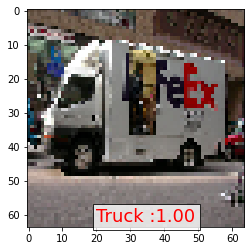

In [25]:
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/Data/test/truck/68548902.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Truck :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Car :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()